# Programming Machine Learning Lab
# Exercise 5

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_5.xxx"**
1. Complete all your tasks and then do a clean run before generating the final pdf. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


### Part 1

**Gradient Descent for Ridge Regression**

In this part of the assignment we will perform linear regression with L2 regularization using Gradient Descent. We will use the **"regression.csv"**. Remember to split the dataset into 80% for training and 20% for test, and perform standard scaling of the features.

You need to code a function which takes in X and y as input and outputs the learned beta values. Also track the loss value over the iterations and plot them. You would need to find the learning rate $\eta$ by trial and error. 

**Coding Hints**
It is easier to break the whole code into small blocks, so you can 
- Create a loss function that takes in X, beta and y_actual and returns the loss value at current step.
- Create a gradient calculation function that takes in X, beta and y_actual and returns the gradient direction for current step.
- Maintaining a list of loss values would help in checking the exit condition as well as help in the plotting at the end.

The algorithm for linear regression with L2 regularization is given below:

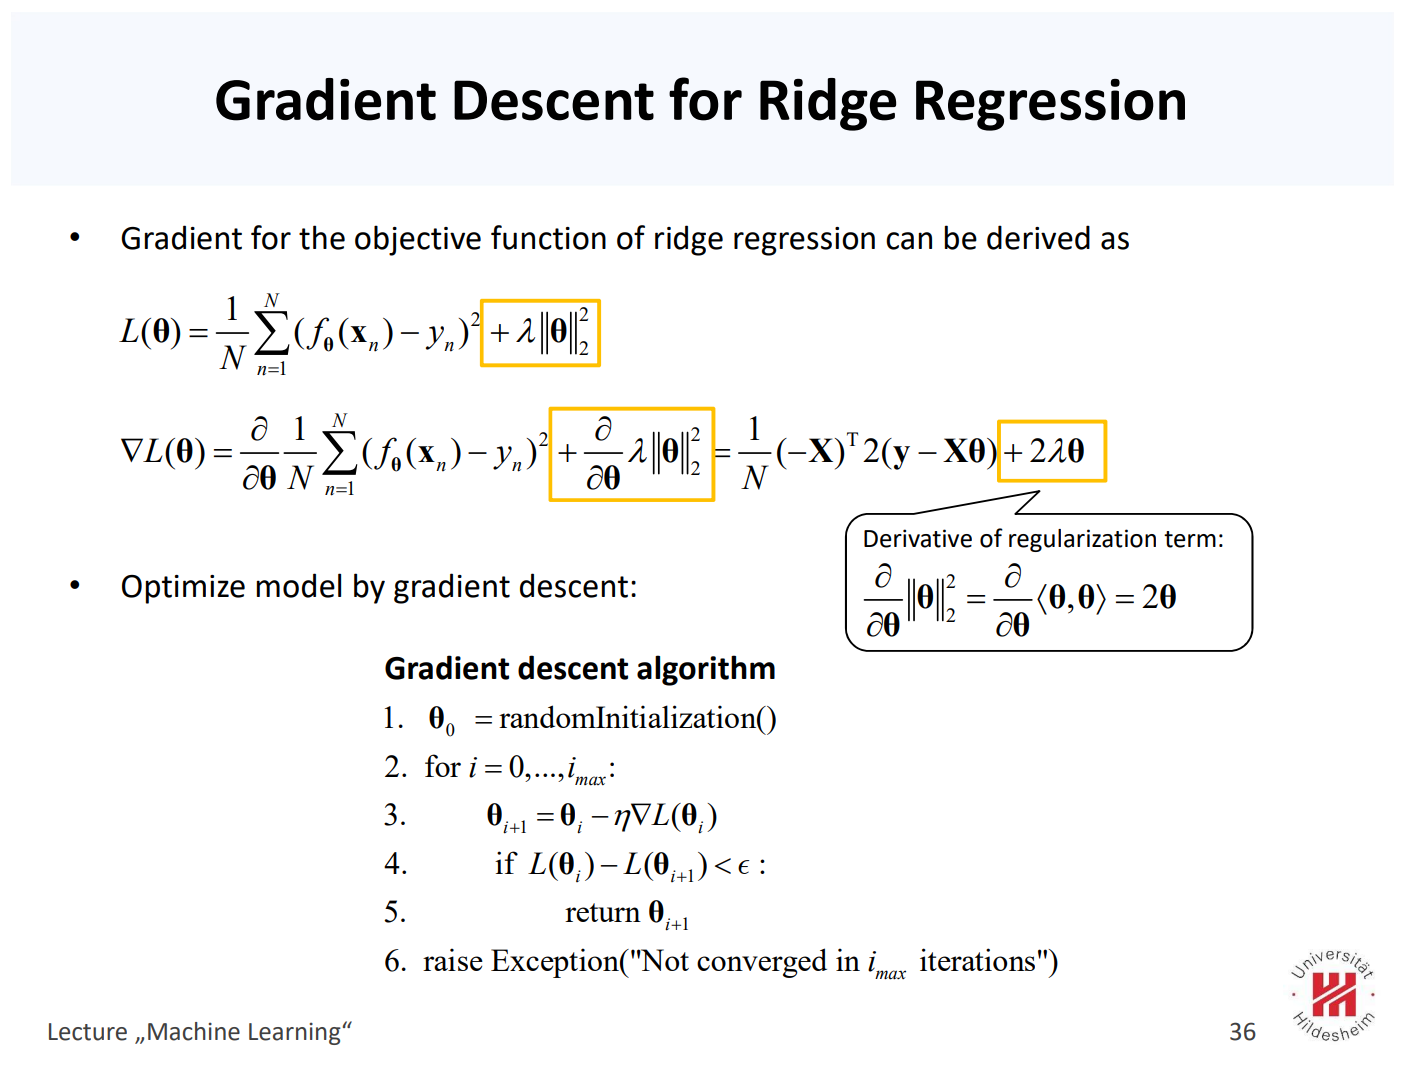

In [1]:
#### write your code here
# imports 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
class Loss:
    def __init__(self, lamb):
        self.history_train = []
        self.history_test = []
        self.lamb = lamb

    def mean_square_loss(self, x, y, theta, x_test, y_test):
        # Mean Square Loss for Regression
        predictions = np.dot(x, theta)
        mse = np.mean((predictions - y) ** 2) + self.lamb*np.sum(theta**2)
        self.history_train.append(mse)
        self.history_test.append(
            np.mean((np.dot(x_test, theta) - y_test) ** 2) + self.lamb*np.sum(theta**2)
        )
        return mse

    def mean_square_loss_gradient(self, x, y, theta):
        # Gradient of Mean Square Loss for Regression
        gradient = 2 * np.dot(x.T, (np.dot(x, theta) - y))  / len(y) + 2*self.lamb*theta
        return gradient

    def cross_entropy_loss(self, x, y, theta, x_test, y_test):
        # Cross Entropy Loss for Classification
        m = len(y)
        h_theta = self.sigmoid(np.dot(x, theta))
        cost = (-1 / m) * np.sum(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))
        self.history_train.append(cost)
        self.history_test.append(
            (-1 / len(y_test)) * np.sum(y_test * np.log(self.sigmoid(np.dot(x_test, theta))) + (1 - y_test) * np.log(1 - self.sigmoid(np.dot(x_test, theta))))
        )
        return cost

    def cross_entropy_loss_gradient(self, x, y, theta):
        # Gradient of Cross Entropy Loss for Classification
        m = len(y)
        h_theta = self.sigmoid(np.dot(x, theta))
        gradient = np.dot(x.T, (h_theta - y)) / m
        return gradient

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))


class Optimization:
    def __init__(self, x, y, x_test, y_test, lamb):
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        self.lamb = lamb
        self.loss = Loss(self.lamb)

    def gradient_descent(self, theta, learning_rate, epochs):
        # Gradient Descent for Mean Square Loss
        m = len(self.y)
        for epoch in range(epochs):
            loss = self.loss.mean_square_loss(
                self.x, self.y, theta, self.x_test, self.y_test
            )
            gradient = self.loss.mean_square_loss_gradient(
                self.x, self.y, theta
            )
            theta = theta - learning_rate * gradient
        return theta

    def newtons_method(self, theta, epochs):
        
        return theta



In [6]:
df = pd.read_csv('regression.csv', header=0, index_col=None)

# Split the dataset into 80% for training and 20% for test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_df.iloc[:, :-1] = scaler.fit_transform(train_df.iloc[:, :-1])
test_df.iloc[:, :-1] = scaler.transform(test_df.iloc[:, :-1])

# Linear Regression class
class LinearRegression:
    def __init__(self, x, y, x_test, y_test, learning_rate=0.01, epochs=100, lamb = 0.5):
        self.x = np.hstack((np.ones((x.shape[0], 1)), x))  # Add a column of ones for the bias term
        self.y = y.reshape(-1, 1)
        self.x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test)) 
        self.y_test = y_test.reshape(-1, 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lamb = lamb

    def fit(self):
        initial_theta = np.zeros((self.x.shape[1], 1))
        self.optimization = Optimization(self.x, self.y, self.x_test, self.y_test, self.lamb)
        self.theta = self.optimization.gradient_descent(initial_theta, self.learning_rate, self.epochs)

    def predict(self, x):
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        return np.dot(x, self.theta)

# Train a linear regression model
X_train = train_df.iloc[:, :-1].values
y_train = train_df['Y'].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df['Y'].values

linear_reg = LinearRegression(X_train, y_train, X_test, y_test)
linear_reg.fit()

print(f'Final validation loss: {linear_reg.optimization.loss.history_test[len(linear_reg.optimization.loss.history_test) - 1]}')
print(f'Betas: {linear_reg.theta}')

# Plot the loss trajectory for both training and testing datasets
plt.plot(linear_reg.optimization.loss.history_train, label='Training Loss')
plt.plot(linear_reg.optimization.loss.history_test, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Loss')
plt.legend()
plt.show()

TypeError: Optimization.__init__() takes 5 positional arguments but 6 were given

**Evaluation**

For evaluation, try at least 3 different values of $\lambda$ (one of them must be 0) and report the test loss. Also comments on the results.

In [2]:
#### write your code here

### Part 2

**L2-Regularized Logistic Regression**

In this part of the assignment we will perform logistic regression with L2 regularization using Gradient Descent. We will use the **"logistic.csv"**. Remember to split the dataset into 80% for training and 20% for test, and perform standard scaling of the features.

You need to code a function which takes in X and y as input and outputs the learned beta values. Also track the loss value over the iterations and plot them. You would need to find the learning rate $\eta$ by trial and error. 

**Coding Hints**
It is easier to break the whole code into small blocks, so you can 
- Create a loss function that takes in X, beta and y_actual and returns the loss value at current step.
- Create a gradient calculation function that takes in X, beta and y_actual and returns the gradient direction for current step.
- Maintaining a list of loss values would help in checking the exit condition as well as help in the plotting at the end.

The algorithm for logistic regression with L2 regularization is given below:

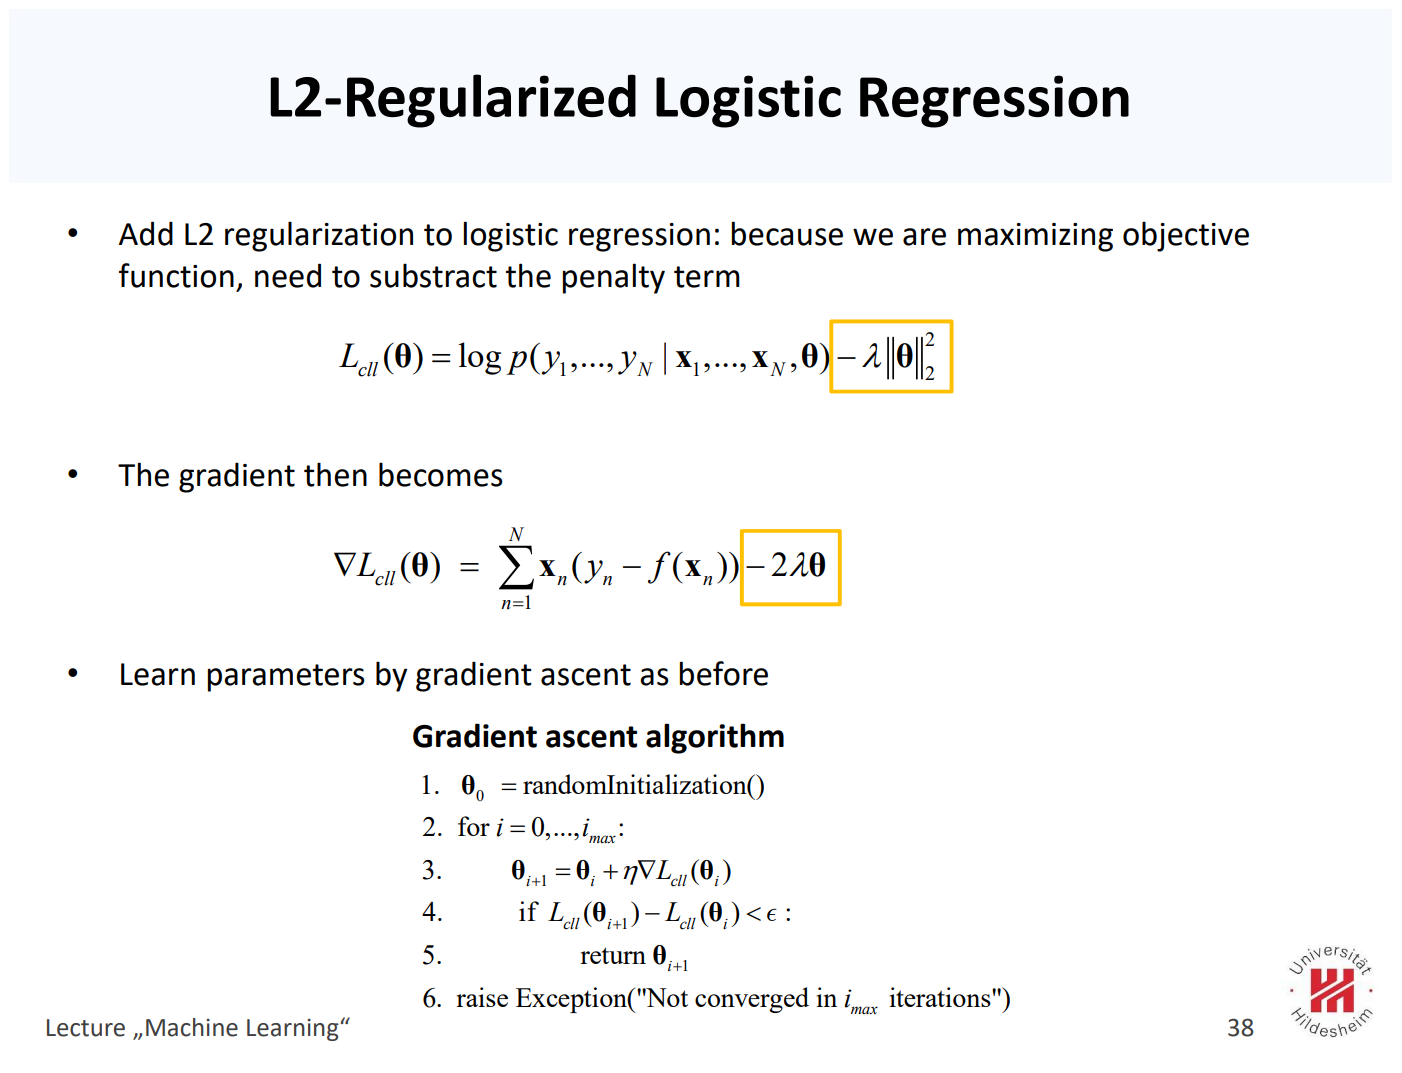

In [3]:
#### write your code here

**Evaluation**

For evaluation, try at least 3 different values of $\lambda$ (one of them must be 0) and report the test losses. Also comments on the results.

In [4]:
#### write your code here